In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data=pd.read_excel('Superstore.xls')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 21)

In [5]:
sub_cat=data['Profit'].groupby(data['Sub-Category']).sum()

In [6]:
#a) Display Subcategory wise sum of profit
sub_cat

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [7]:
#b) Exclude Office Furniture SubCategory
sub_cat[sub_cat.index != 'Furnishings']

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [8]:
#c) Sort SubCategory in Desc order
sub_cat.sort_index(ascending=False)

Sub-Category
Tables        -17725.4811
Supplies       -1189.0995
Storage        21278.8264
Phones         44515.7306
Paper          34053.5693
Machines        3384.7569
Labels          5546.2540
Furnishings    13059.1436
Fasteners        949.5182
Envelopes       6964.1767
Copiers        55617.8249
Chairs         26590.1663
Bookcases      -3472.5560
Binders        30221.7633
Art             6527.7870
Appliances     18138.0054
Accessories    41936.6357
Name: Profit, dtype: float64

In [9]:
cat=data['Profit'].groupby(data['Category']).sum()

In [10]:
sizes=cat.values

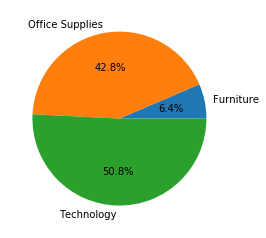

In [11]:
#d) Categorywise sum of profit in pie chart
plt.pie(sizes,labels=['Furniture','Office Supplies','Technology'],autopct='%1.1f%%')
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [13]:
year_wise=data['Profit'].groupby(data['Order Date'].dt.year).sum()

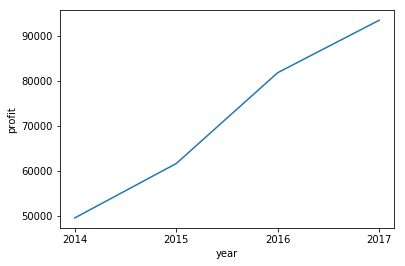

In [14]:
#e) Line Chart yearwise sum of profit
ax=plt.subplot(111)
plt.plot(year_wise)
plt.xlabel('year')
plt.ylabel('profit')
ax.set_xticks([2014,2015, 2016, 2017])
plt.show()

In [15]:
#f) Display Top 10 most profitable customers
data['Profit'].groupby(data['Customer ID']).sum().sort_values(ascending=False)[:10]

Customer ID
TC-20980    8981.3239
RB-19360    6976.0959
SC-20095    5757.4119
HL-15040    5622.4292
AB-10105    5444.8055
TA-21385    4703.7883
CM-12385    3899.8904
KD-16495    3038.6254
AR-10540    2884.6208
DR-12940    2869.0760
Name: Profit, dtype: float64

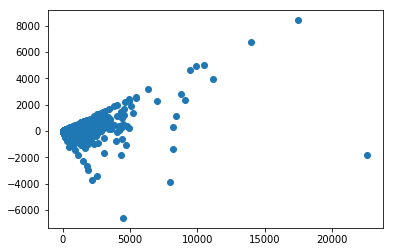

In [16]:
#g) scatter plot between profit and sales
plt.scatter(data['Sales'],data['Profit'],)
plt.show()